# M1 Problem Sheet 2

### 1) MNIST Regression 

##### (a)  Working with Linear regression

##### (i) intiial

In [228]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse

mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data() #x is the image data, y is the target number
x_train, x_test = x_train / 255.0, x_test / 255.0 #reduces range from 0-255 to between 0-1 for better greyscale

In [ ]:
x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

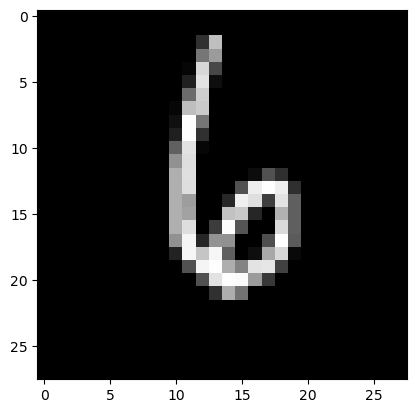

In [ ]:
plt.imshow(x_train[10540],cmap='gray')

In [ ]:
clf = LogisticRegression(penalty='l2',tol=1e-2,solver='sag',multi_class='multinomial')
clf.fit(np.array(x_train.reshape((60000,784))[:10000]),y_train[:10000])
score = clf.score(np.array(x_test.reshape((10000,784))[:10000]),y_test)
score

/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9078

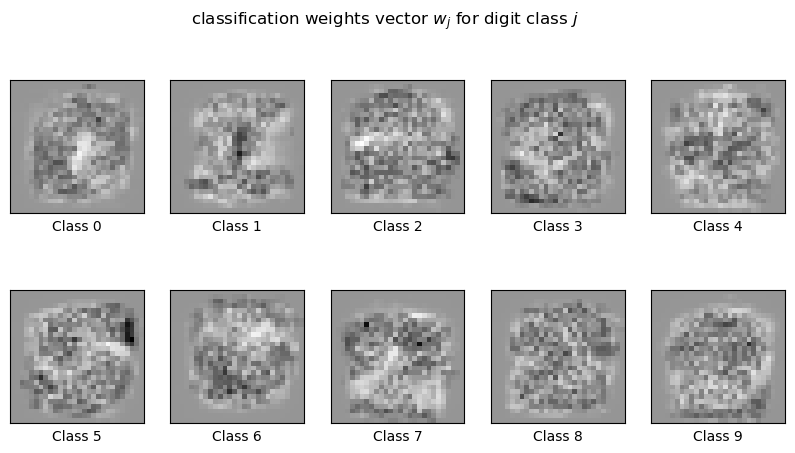

In [ ]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

In [ ]:
clf.predict(x_test[:50].reshape(50,784))

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1], dtype=uint8)

In [ ]:
y_test[:30]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1], dtype=uint8)

In [ ]:
mask = clf.predict(x_test[:50].reshape(50,784)) != y_test[:50]
inc_vals = np.where(mask)

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

Text(0.5, 1.0, 'Target: 4')

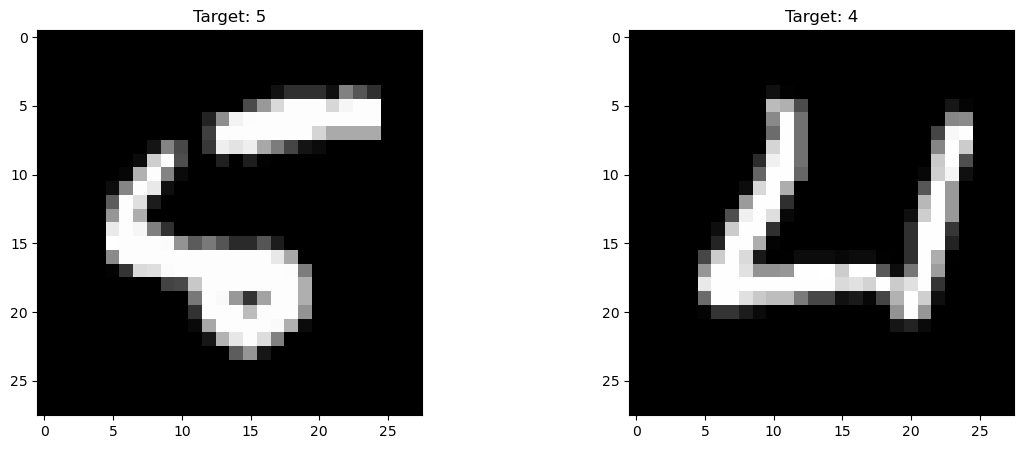

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(x_test[np.where(mask)][0],cmap='gray')
axes[0].set_title(f"Target: {y_test[np.where(mask)[0][0]]}")
axes[1].imshow(x_test[np.where(mask)[0][1 ]],cmap='gray')
axes[1].set_title(f"Target: {y_test[np.where(mask)[0][1]]}")

In [ ]:
print(y_test[np.where(mask)[0][0]])


5


In [114]:
x_train.shape


(60000, 28, 28)

##### (ii) scanning over hyper parameters

In [157]:
pen_arr = np.array(['l1','l2'])
tol_arr = np.logspace(-8,0,num=9)
solv_arr = np.array(["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"])

In [163]:
score_arr = np.zeros(pen_arr.shape)
for i, penalty_type in enumerate(pen_arr):
    clf = LogisticRegression(penalty=penalty_type,tol=1e-2,solver='saga',multi_class='multinomial')
    clf.fit(np.array(x_train.reshape((60000,784))[:10000]),y_train[:10000])
    score_arr[i] = clf.score(np.array(x_test.reshape((10000,784))[:10000]),y_test)

/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<BarContainer object of 2 artists>

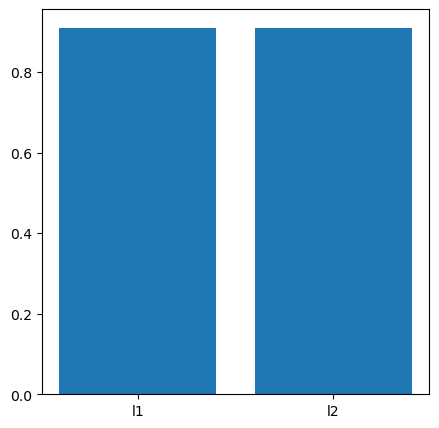

In [169]:
plt.figure(figsize=(5,5))
plt.bar(pen_arr,score_arr)

In [171]:
score_arr = np.zeros(tol_arr.shape)
for i, tolerance in enumerate(tol_arr):
    clf = LogisticRegression(penalty='l2',tol=tolerance,solver='saga',multi_class='multinomial')
    clf.fit(np.array(x_train.reshape((60000,784))[:10000]),y_train[:10000])
    score_arr[i] = clf.score(np.array(x_test.reshape((10000,784))[:10000]),y_test)

/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/ana

Text(0.5, 0, 'Tolerance')

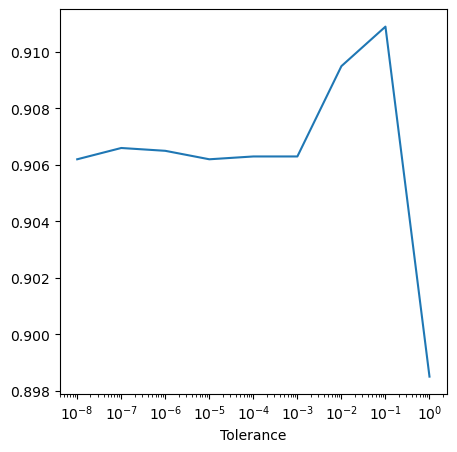

In [175]:
plt.figure(figsize=(5,5))
plt.plot(tol_arr,score_arr)
plt.xscale('log')
plt.xlabel('Tolerance')

In [177]:
score_arr = np.zeros(solv_arr.shape)
for i, solver_type in enumerate(solv_arr):
    clf = LogisticRegression(penalty='l2',tol=1e-2,solver=solver_type)
    clf.fit(np.array(x_train.reshape((60000,784))[:10000]),y_train[:10000])
    score_arr[i] = clf.score(np.array(x_test.reshape((10000,784))[:10000]),y_test)

/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


[Text(0, 0, '85.1%'),
 Text(0, 0, '90.5%'),
 Text(0, 0, '89.8%'),
 Text(0, 0, '90.5%'),
 Text(0, 0, '90.8%'),
 Text(0, 0, '91.0%')]

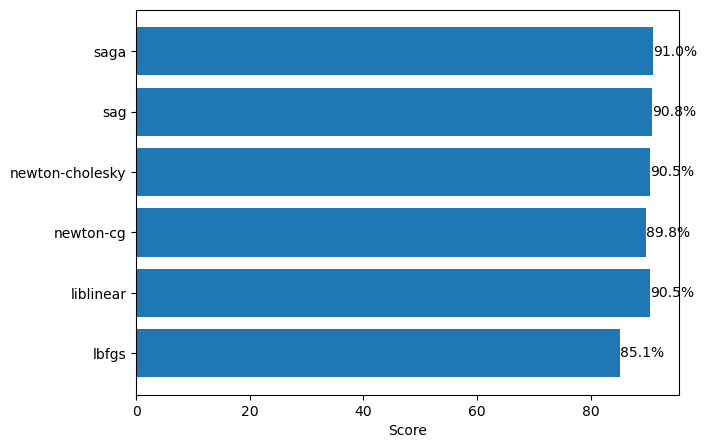

In [192]:
plt.figure(figsize=(7,5))
bars = plt.barh(solv_arr,score_arr*100)
plt.xlabel('Score')
plt.bar_label(bars, fmt='%.1f%%')

In [193]:
clf = LogisticRegression(penalty='l2',tol=1e-1,solver='saga',multi_class='multinomial')
clf.fit(np.array(x_train.reshape((60000,784))[:10000]),y_train[:10000])
score = clf.score(np.array(x_test.reshape((10000,784))[:10000]),y_test)
score

/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9095

#### (b) Working with SGDClassifier

In [122]:
clf_sgdc = SGDClassifier(loss='hinge',penalty='l2',alpha=0.0001, max_iter=1000,)
clf_sgdc.fit(x_train.reshape(60000,784),y_train)
score_sgdc = clf_sgdc.score(x_test.reshape(10000,784),y_test)
score

0.9153

Targets: [5 8 3 7]
Predictions: [6 2 2 9]


Text(0.5, 1.0, 'Target: 8')

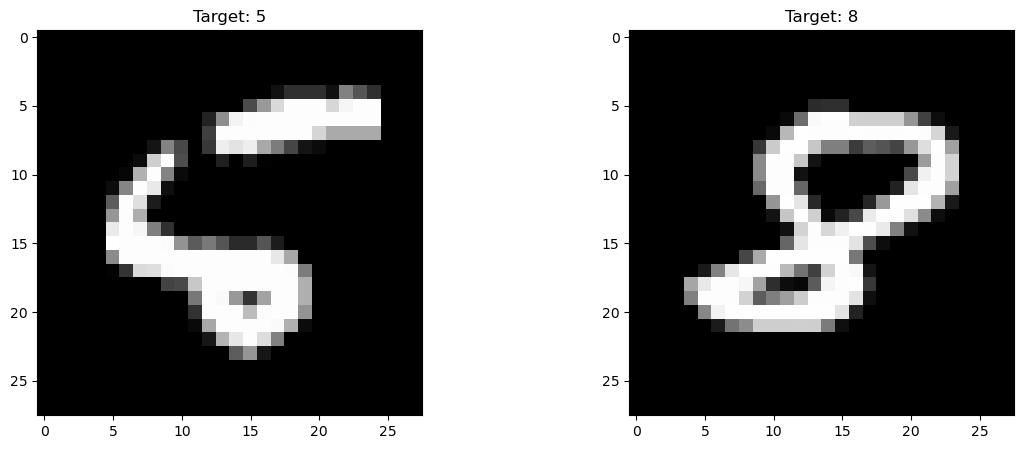

In [141]:
n_tests = 100
mask = clf_sgdc.predict(x_test[:n_tests].reshape(n_tests,784)) != y_test[:n_tests]
inc_vals = np.where(mask)
print("Targets:",y_test[inc_vals])
print("Predictions:",clf_sgdc.predict(x_test[:n_tests].reshape(n_tests,784))[inc_vals])

fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(x_test[np.where(mask)][0],cmap='gray')
axes[0].set_title(f"Target: {y_test[np.where(mask)[0][0]]}")
axes[1].imshow(x_test[np.where(mask)[0][1 ]],cmap='gray')
axes[1].set_title(f"Target: {y_test[np.where(mask)[0][1]]}")

##### (b)(ii)

In [194]:
pen_arr = np.array(['l1','l2'])
alpha_arr = np.logspace(-9,0,num=10)
loss_arr = np.array(['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'])

In [200]:
score_arr = np.zeros(pen_arr.shape)
for i, penalty_type in enumerate(pen_arr):
    clf_sgdc = SGDClassifier(loss='hinge',penalty=penalty_type,alpha=0.0001, max_iter=1000)
    clf_sgdc.fit(np.array(x_train.reshape((60000,784))[:10000]),y_train[:10000])
    score_arr[i] = clf_sgdc.score(np.array(x_test.reshape((10000,784))[:10000]),y_test)

[Text(0, 0, '0.8829'), Text(0, 0, '0.8916')]

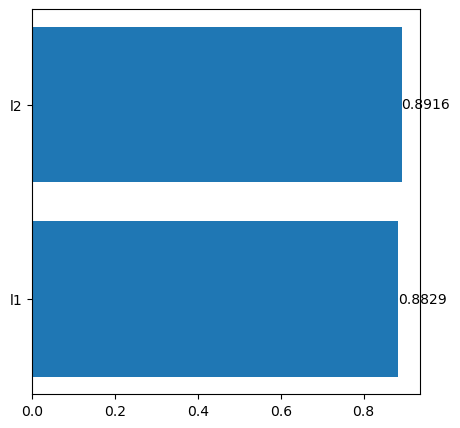

In [201]:
plt.figure(figsize=(5,5))
bars = plt.barh(pen_arr,score_arr)
plt.bar_label(bars)

In [202]:
score_arr = np.zeros(alpha_arr.shape)
for i, tolerance in enumerate(alpha_arr):
    clf_sgdc = SGDClassifier(loss='hinge',penalty='l2',alpha=tolerance, max_iter=1000)
    clf_sgdc.fit(np.array(x_train.reshape((60000,784))[:10000]),y_train[:10000])
    score_arr[i] = clf_sgdc.score(np.array(x_test.reshape((10000,784))[:10000]),y_test)

Text(0.5, 0, 'Tolerance')

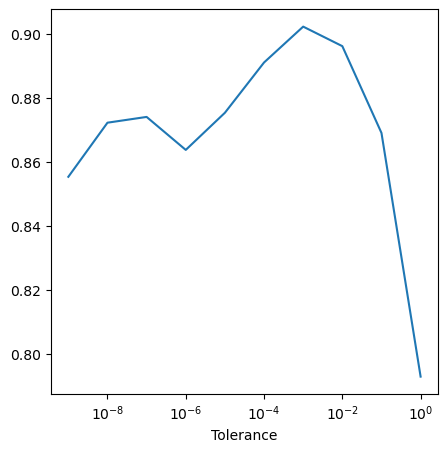

In [204]:
plt.figure(figsize=(5,5))
plt.plot(alpha_arr,score_arr)
plt.xscale('log')
plt.xlabel('Tolerance')

In [207]:
score_arr = np.zeros(loss_arr.shape)
for i, l_type in enumerate(loss_arr):
    clf_sgdc = SGDClassifier(loss=l_type,penalty='l2',alpha=0.00001, max_iter=1000)
    clf_sgdc.fit(np.array(x_train.reshape((60000,784))[:10000]),y_train[:10000])
    score_arr[i] = clf_sgdc.score(np.array(x_test.reshape((10000,784))[:10000]),y_test)

[Text(0, 0, '88.4%'),
 Text(0, 0, '87.4%'),
 Text(0, 0, '85.5%'),
 Text(0, 0, '86.7%'),
 Text(0, 0, '86.0%'),
 Text(0, 0, '6.2%'),
 Text(0, 0, '41.9%'),
 Text(0, 0, '33.9%'),
 Text(0, 0, '15.0%')]

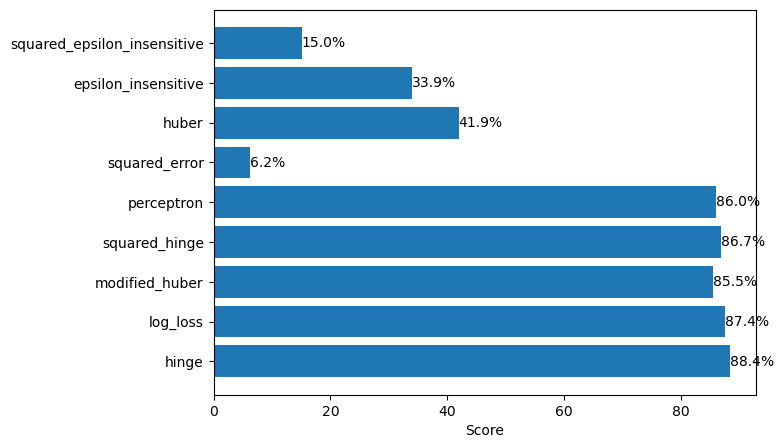

In [208]:
plt.figure(figsize=(7,5))
bars = plt.barh(loss_arr,score_arr*100)
plt.xlabel('Score')
plt.bar_label(bars, fmt='%.1f%%')

### (2) 1D Ising regression

(a) Plotting the error for the for both the test and the train datasets over various parameters.

In [217]:
L=40 #the length of the isings states so the lengths is L particles long

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states) #finds the energy in each of the the 10000 Ising states

    return E
# calculate Ising energies
energies=ising_energies(states,L)

In [224]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
statesold2=states
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2]))
# build final data set
Data=[states,energies]

In [259]:
# define number of samples
n_samples=1000
# define train and test data sets
X_train=Data[0][:n_samples]
Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=Data[0][n_samples:3*n_samples//2]
Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

In [260]:
%matplotlib inline

# set up Lasso and Ridge Regression models
leastsq=linear_model.LinearRegression()
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()

# define error lists
train_errors_leastsq = []
test_errors_leastsq = []

train_errors_ridge = []
test_errors_ridge = []

train_errors_lasso = []
test_errors_lasso = []

# set refularisations trength values
lmbdas = np.logspace(-4, 5, 10)

#Initialize coeffficients for ridge regression and Lasso
coefs_leastsq = []
coefs_ridge = []
coefs_lasso=[]

for lmbda in lmbdas:
    
    # ### ordinary least squares
    # leastsq.fit(X_train, Y_train) # fit model 
    # coefs_leastsq.append(leastsq.coef_) # store weights
    # # using the mean squared error as the loss.
    # train_errors_leastsq.append(mse(X_train[:,-1],Y_train))
    # test_errors_leastsq.append(mse(X_test[:,-1],Y_test))

    ### apply Ridge regression
    ridge.set_params(alpha=lmbda) # set regularisation parameter
    ridge.fit(X_train, Y_train) # fit model 
    coefs_ridge.append(ridge.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(mse(ridge.predict(X_train),Y_train))
    test_errors_ridge.append(mse(ridge.predict(X_test),Y_test))
    # train_errors_ridge.append(ridge.score(X_train, Y_train))
    # test_errors_ridge.append(ridge.score(X_test,Y_test))
    
    ### apply Ridge regression
    lasso.set_params(alpha=lmbda) # set regularisation parameter
    lasso.fit(X_train, Y_train) # fit model
    coefs_lasso.append(lasso.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_lasso.append(mse(lasso.predict(X_train), Y_train))
    test_errors_lasso.append(mse(lasso.predict(X_test),Y_test))
    # train_errors_lasso.append(lasso.score(X_train, Y_train))
    # test_errors_lasso.append(lasso.score(X_test,Y_test))

/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.382e+00, tolerance: 3.997e+00
  model = cd_fast.enet_coordinate_descent(


In [261]:
train_errors_lasso, test_errors_lasso

([8.918930342039777e-07,
  4.2390196340947345e-05,
  0.004241832553454036,
  0.42418322721175755,
  32.92862527658066,
  39.96774399999999,
  39.96774399999999,
  39.96774399999999,
  39.96774399999999,
  39.96774399999999],
 [1.0676942090432762e-06,
  4.56383049293049e-05,
  0.00456849374210922,
  0.45685617249270105,
  33.421053746286084,
  38.91328,
  38.91328,
  38.91328,
  38.91328,
  38.91328])

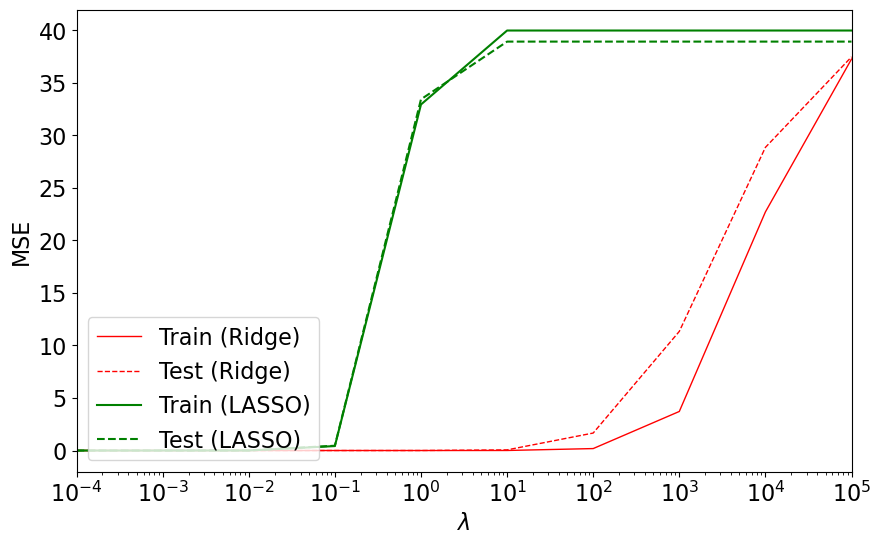

In [262]:
# # Plot our performance on both the training and test data
# plt.semilogx(lmbdas, train_errors_leastsq, 'b',label='Train (OLS)')
# plt.semilogx(lmbdas, test_errors_leastsq,'--b',label='Test (OLS)')
plt.semilogx(lmbdas, train_errors_ridge,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_errors_ridge,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lmbdas, test_errors_lasso, '--g',label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=16)
#plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('MSE',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()